### Import the required libraries and modules that you would need.


In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris, load_breast_cancer
from sklearn.datasets import fetch_california_housing
from sklearn.datasets import load_iris, load_breast_cancer
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
%matplotlib inline 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,  ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

### Read that data into Python and call the dataframe churnData.
### Check the datatypes of all the columns in the data.


In [2]:
#Read that data into Python and call the dataframe churnData.
data = "DATA_Customer-Churn.csv"
churnData = pd.read_csv(data)
churnData.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [3]:
churnData.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.5,No
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes


### You will see that the column TotalCharges is object type. Convert this column into numeric type using pd.to_numeric function.

In [4]:
churnData['TotalCharges'] = pd.to_numeric(churnData['TotalCharges'], errors='coerce')

In [5]:
churnData['MonthlyCharges'] = churnData['MonthlyCharges'].astype(int)

### Check for null values in the dataframe. Replace the null values.


In [6]:
def null_check(df):
    print(f'Total null values per row: \n{df.isnull().sum(axis=1)}\n')
    print(f'Total null values per column: \n{df.isnull().sum()}\n')
    
null_check(churnData)

Total null values per row: 
0       0
1       0
2       0
3       0
4       0
       ..
7038    0
7039    0
7040    0
7041    0
7042    0
Length: 7043, dtype: int64

Total null values per column: 
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64



### Use the following features: tenure, SeniorCitizen, MonthlyCharges and TotalCharges:
- Split the data into a training set and a test set.
- Scale the features either by using normalizer or a standard scaler.
- Fit a logistic Regression model on the training data.
- Fit a Knn Classifier(NOT KnnRegressor please!)model on the training data.

In [7]:
churnData['TotalCharges'] = churnData['TotalCharges'].fillna(0)

In [8]:
churnData['Churn'] = churnData['Churn'].map({'No': 0, 'Yes': 1})

In [9]:
y = churnData[['Churn']]

In [10]:
X = churnData[['tenure', 'SeniorCitizen', 'MonthlyCharges', 'TotalCharges']]

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=11)


In [13]:
y_test.head(3)

,Churn
6625,1
5975,1
6891,0


### Upsampling using SMOTE


In [14]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [15]:
y.value_counts()

Churn
0        5174
1        1869
Name: count, dtype: int64

In [16]:
X_sm, y_sm = smote.fit_resample(X_train, y_train)
y_sm.value_counts()

Churn
0        4143
1        4143
Name: count, dtype: int64

## Scale the features either by using normalizer or a standard scaler.

In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [18]:
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

array([[<Axes: title={'center': 'Churn'}>]], dtype=object)

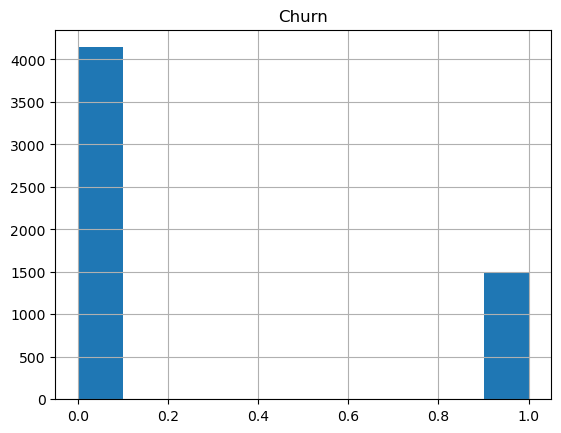

In [19]:
y_train.hist()

In [20]:
scaler.fit(X_train)

StandardScaler()

## Fit a logistic Regression model on the training data

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix



log_model = LogisticRegression() 

X_train_log = scaler.transform(X_train)
X_test_log = scaler.transform(X_test)

#where the magic happens

log_model.fit(X_train_log, y_train)

y_pred_train_log = log_model.predict(X_train_log)
y_pred_test_log = log_model.predict(X_test_log)

performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_log),
                                         precision_score(y_train, y_pred_train_log),
                                         recall_score(y_train, y_pred_train_log)],
                               'Test': [accuracy_score(y_test, y_pred_test_log),
                                        precision_score(y_test, y_pred_test_log),
                                        recall_score(y_test, y_pred_test_log)]})

display(performance_log)



/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,Error_metric,Train,Test
0,Accuracy,0.789492,0.801278
1,Precision,0.647915,0.692913
2,Recall,0.448021,0.465608


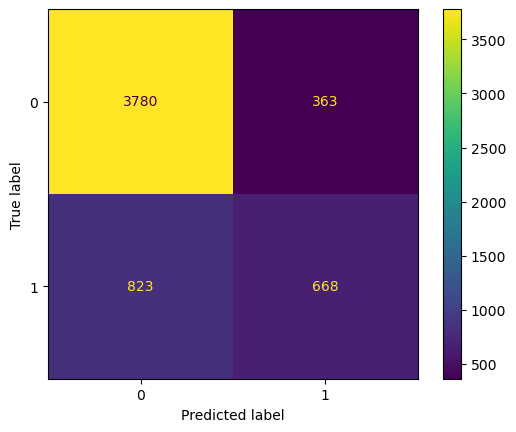

In [22]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm_train = confusion_matrix(y_train, y_pred_train_log, labels = log_model.classes_)
disp = ConfusionMatrixDisplay(cm_train)
disp.plot()

In [23]:
X_test

,tenure,SeniorCitizen,MonthlyCharges,TotalCharges
6625,12,1,91,1094.50
5975,7,0,89,608.80
6891,4,0,29,129.60
1681,72,0,25,1849.20
4780,9,0,70,657.50
...,...,...,...,...
6525,55,0,20,1177.95
710,1,0,19,19.55
6639,50,0,103,5236.40
6844,29,0,89,2623.65


## Fit a Knn Classifier(NOT KnnRegressor please!)model on the training data.

In [24]:
model = KNeighborsClassifier(n_neighbors=5,weights='uniform') # declare we're using knn classification model
model.fit(X_train, y_train) # train model
y_pred = model.predict(X_test.values) # predict test
y_pred_train=model.predict(X_train.values) # predict train (for sanity checks)

performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train),
                                         precision_score(y_train, y_pred_train),
                                         recall_score(y_train, y_pred_train)],
                               'Test': [accuracy_score(y_test, y_pred),
                                        precision_score(y_test, y_pred),
                                        recall_score(y_test, y_pred)]})

display(performance_log)

/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


,Error_metric,Train,Test
0,Accuracy,0.833688,0.770050
1,Precision,0.742557,0.600746
2,Recall,0.568746,0.425926


In [25]:
y_pred

array([1, 1, 1, ..., 0, 0, 0])

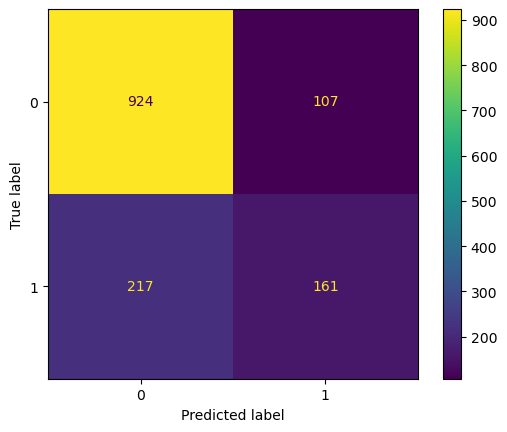

In [26]:
cm = confusion_matrix(y_test, y_pred, labels= model.classes_)
disp = ConfusionMatrixDisplay(cm)
disp.plot()

## Fit a Decision Tree Classifier on the training data.
## Check the accuracy on the test data.

- Feature Importance


In [27]:
y.value_counts()

Churn
0        5174
1        1869
Name: count, dtype: int64

In [28]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
#from sklearn.metrics import plot_confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=11)

# Bear in mind that sklearn uses a different function for decission trees used for 
# classification ( to predict a categorical feature ): DecisionTreeClassifier() 
model = DecisionTreeClassifier(max_depth=4)

model.fit(X_train, y_train)

y_pred_train_dt = model.predict(X_train)
y_pred_test_dt = model.predict(X_test)


performance_df = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_dt),
                                         precision_score(y_train, y_pred_train_dt),
                                         recall_score(y_train, y_pred_train_dt)],
                               'Test': [accuracy_score(y_test, y_pred_test_dt),
                                        precision_score(y_test, y_pred_test_dt),
                                        recall_score(y_test, y_pred_test_dt)]})

display(performance_df)

,Error_metric,Train,Test
0,Accuracy,0.791684,0.781827
1,Precision,0.660714,0.657224
2,Recall,0.427911,0.405594


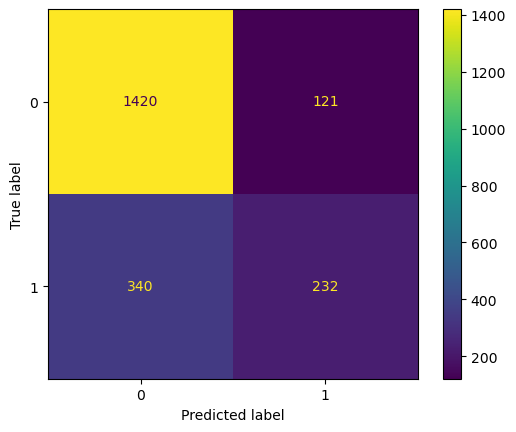

In [29]:
cm = confusion_matrix(y_test, y_pred_test_dt, labels=model.classes_)
disp = ConfusionMatrixDisplay(cm)
disp.plot()

<BarContainer object of 4 artists>

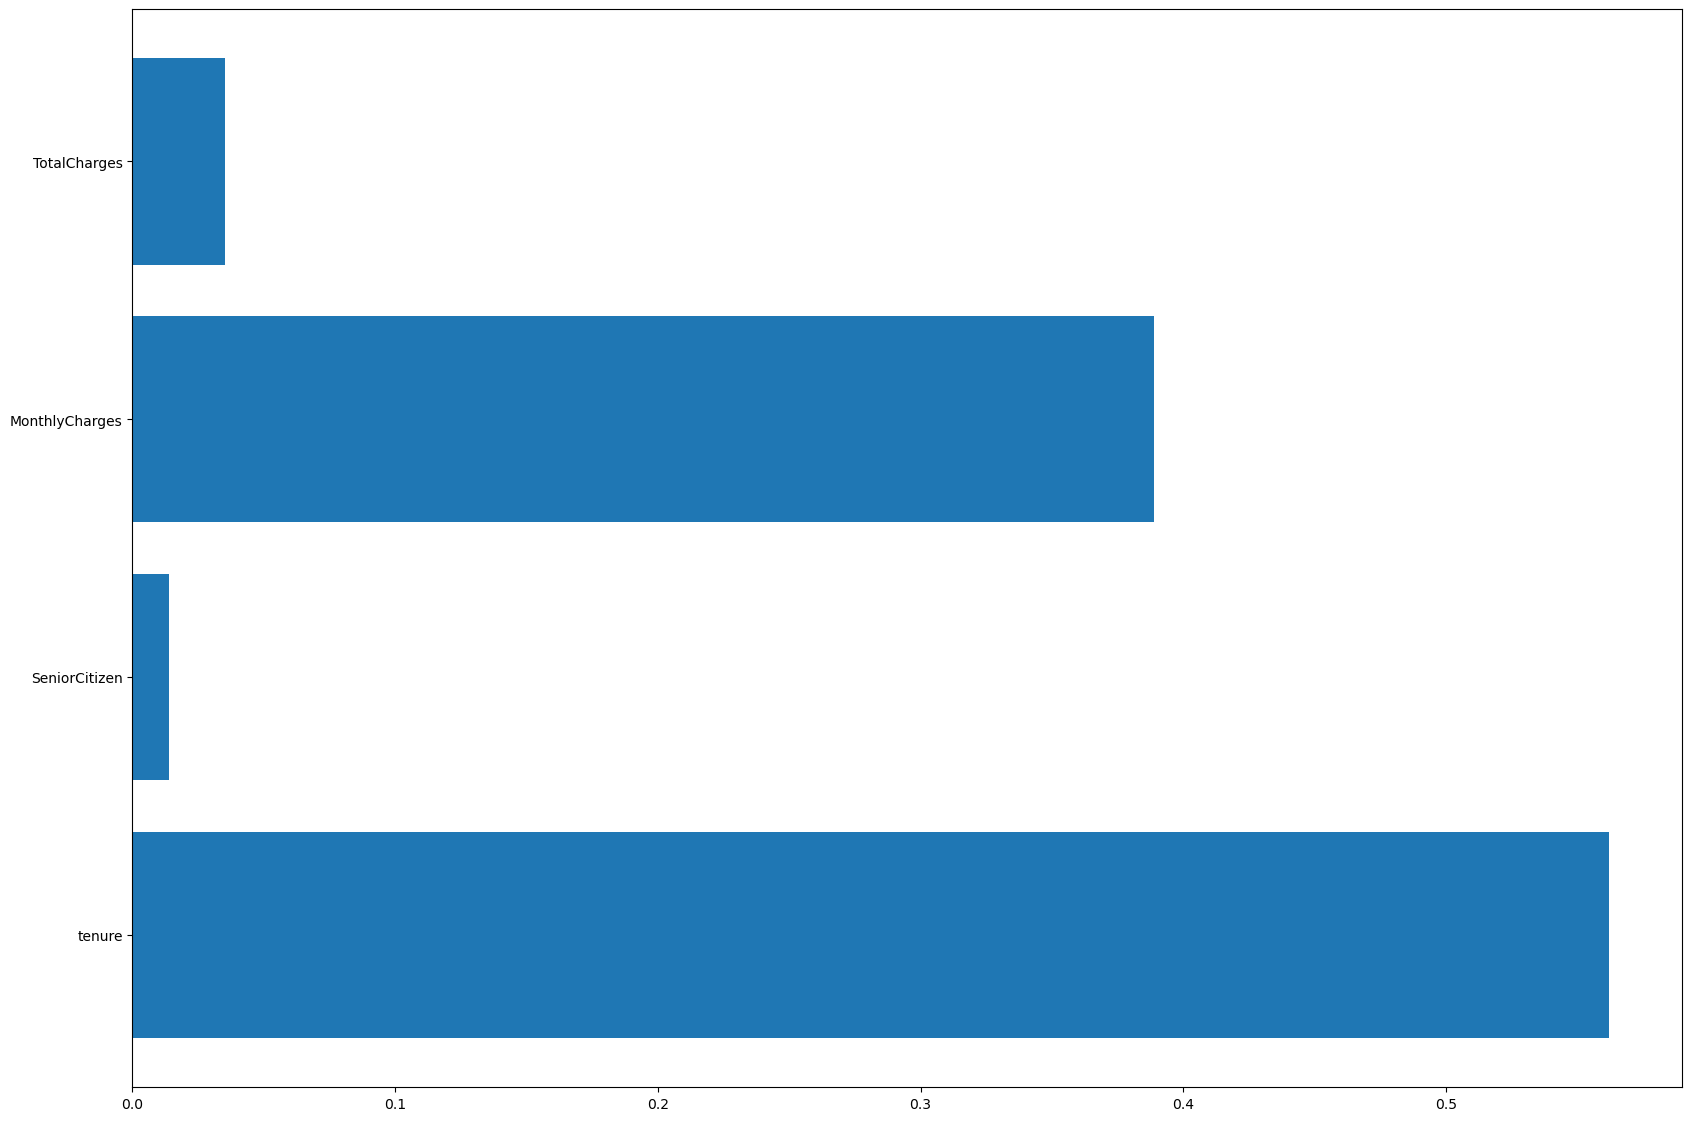

In [30]:
plt.figure(figsize=(20,14))
plt.barh(X.columns,model.feature_importances_)

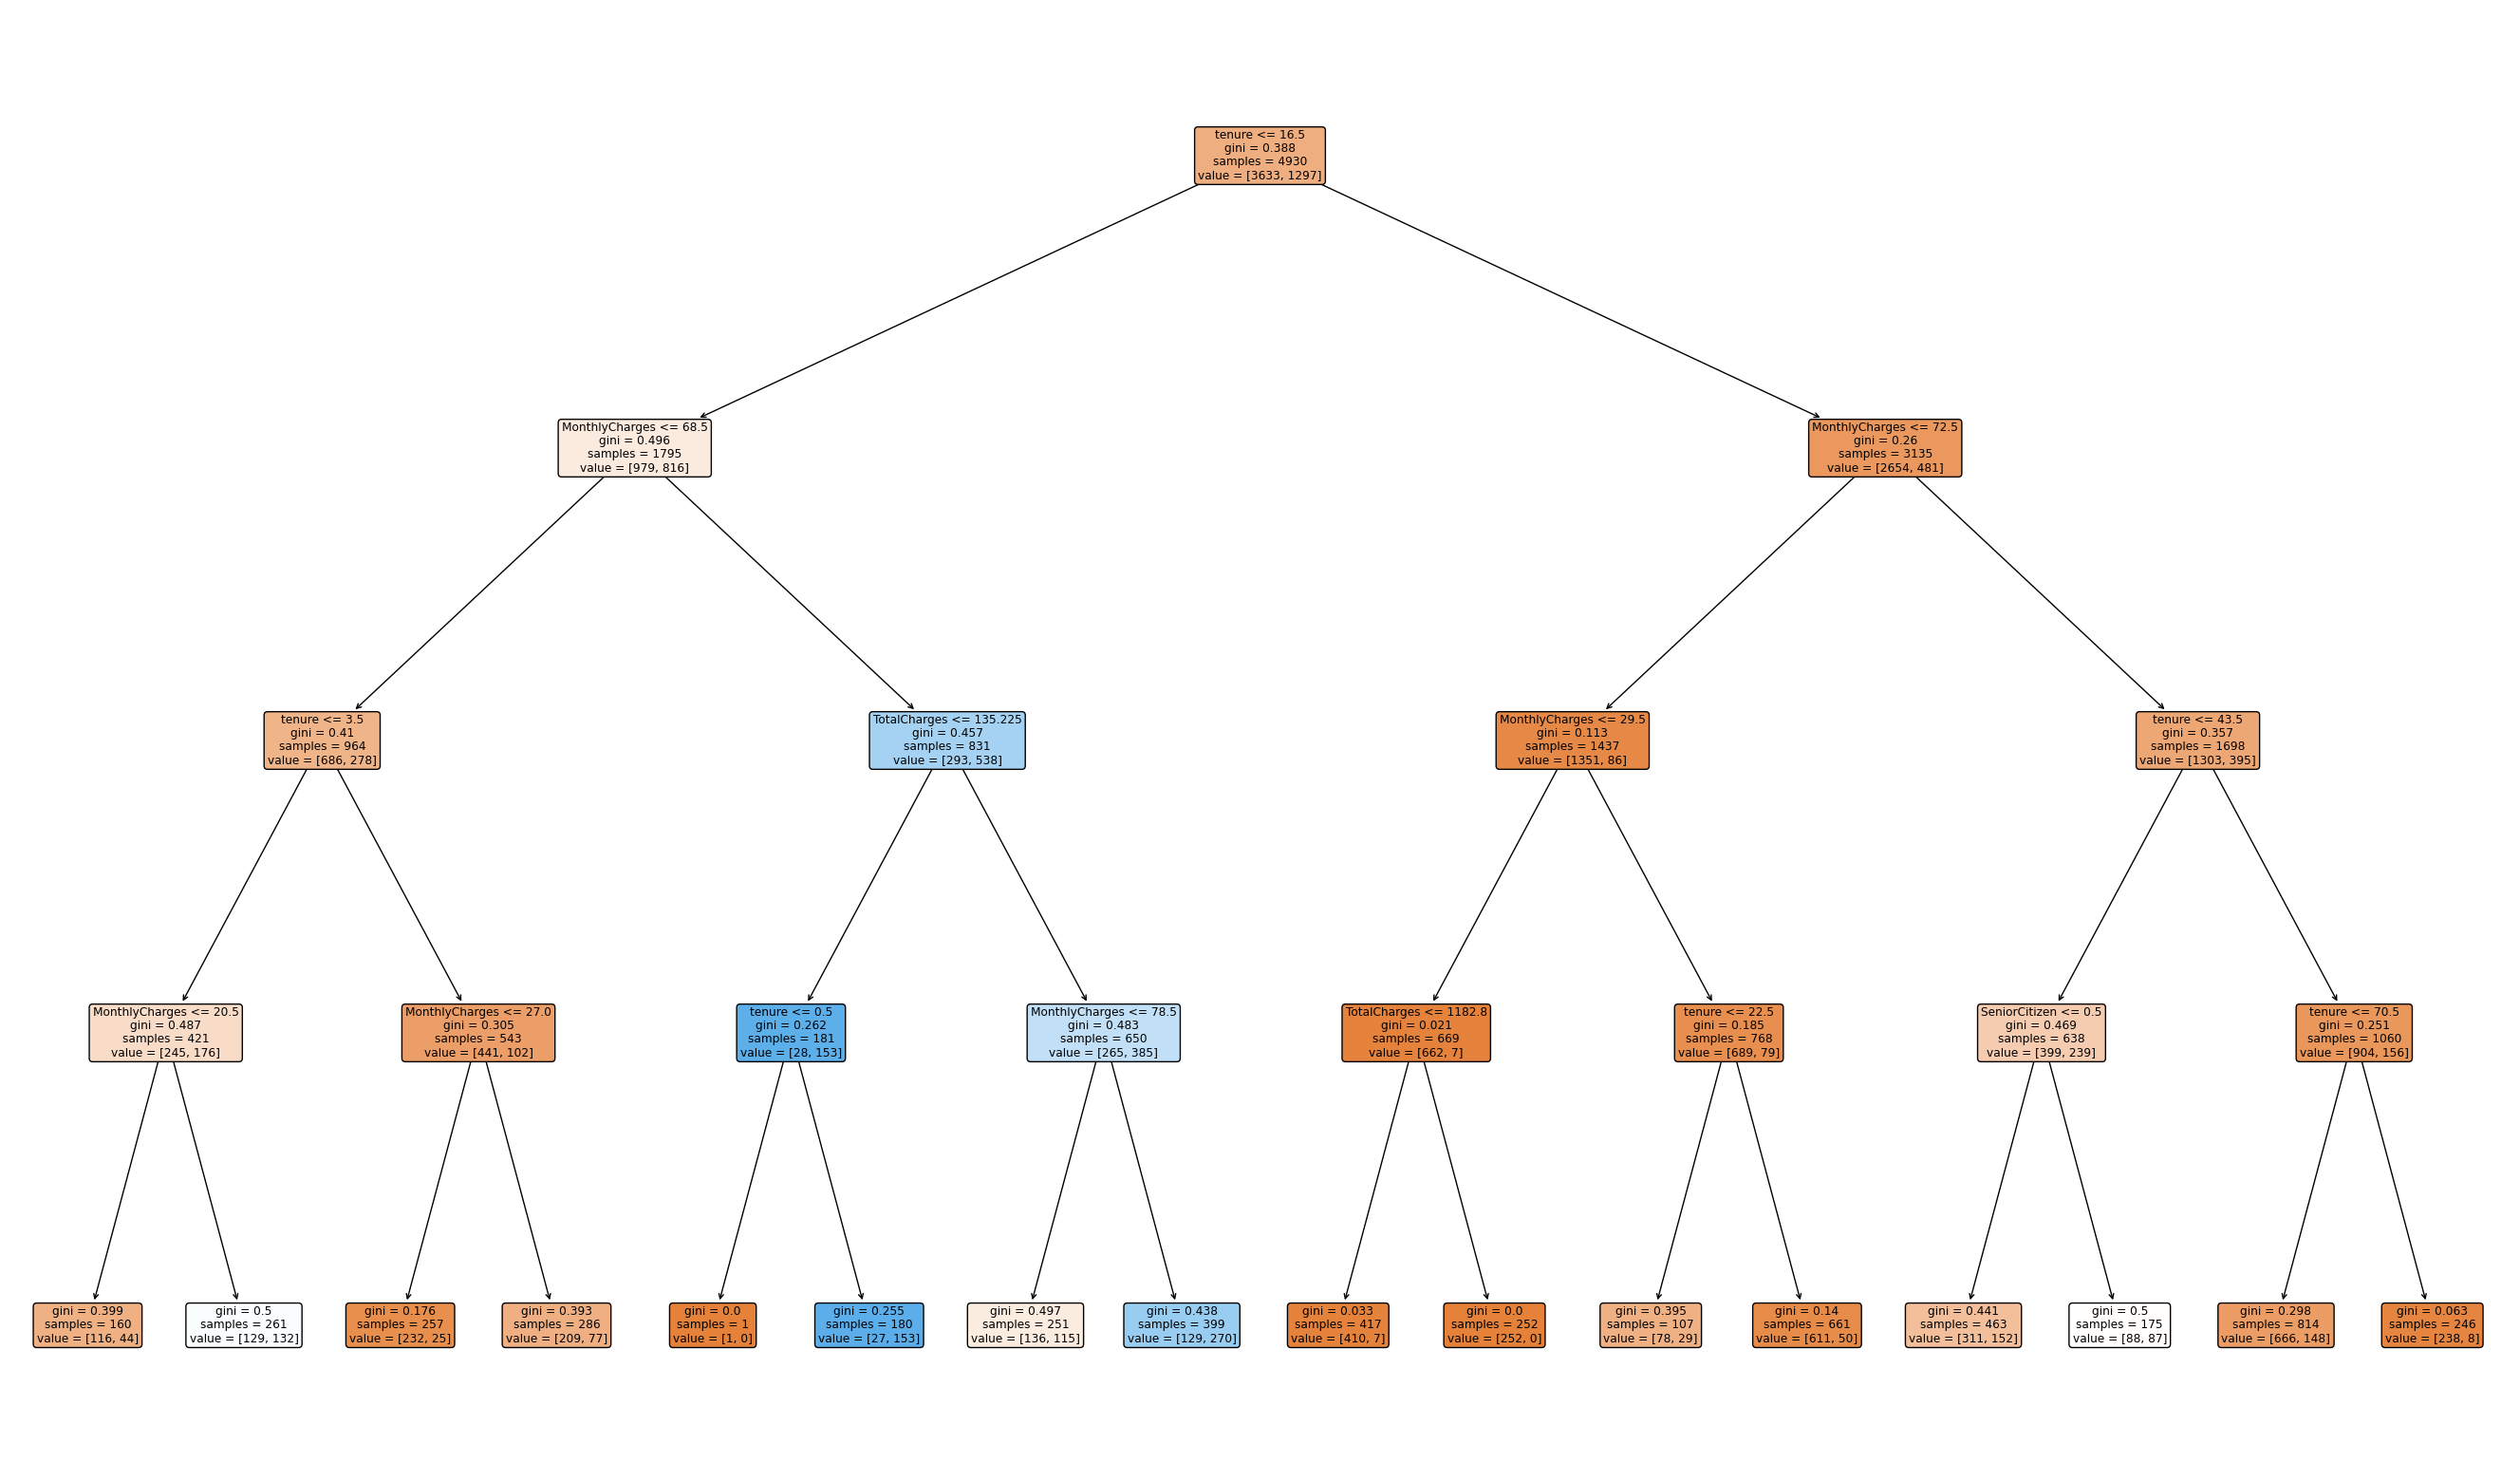

In [31]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (34,20))

plot_tree(model,filled = True, rounded=True,feature_names=list(X.columns))
plt.show() 

In [32]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score

def evaluate_max_depths(X, y, max_depth_values):
    results = []

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=11)

    for max_depth in max_depth_values:
        model = DecisionTreeClassifier(max_depth=max_depth)
        model.fit(X_train, y_train)

        y_pred_train = model.predict(X_train)
        y_pred_test = model.predict(X_test)

        performance_metrics = {
            'max_depth': max_depth,
            'Accuracy_train': accuracy_score(y_train, y_pred_train),
            'Precision_train': precision_score(y_train, y_pred_train),
            'Recall_train': recall_score(y_train, y_pred_train),
            'Accuracy_test': accuracy_score(y_test, y_pred_test),
            'Precision_test': precision_score(y_test, y_pred_test),
            'Recall_test': recall_score(y_test, y_pred_test)
        }

        results.append(performance_metrics)

    results_df = pd.DataFrame(results)
    return results_df

# Example usage:
max_depth_values = [3, 4, 5, 7]
performance_results = evaluate_max_depths(X, y, max_depth_values)
print(performance_results)


   max_depth  Accuracy_train  Precision_train  Recall_train  Accuracy_test  \
0          3        0.786613         0.647413      0.414803       0.778514   
1          4        0.791684         0.660714      0.427911       0.781827   
2          5        0.798986         0.703457      0.407864       0.781827   
3          7        0.816024         0.776204      0.422513       0.781354   

   Precision_test  Recall_test  
0        0.663522     0.368881  
1        0.657224     0.405594  
2        0.677316     0.370629  
3        0.678571     0.365385  


## Cross Validation

In [54]:
scores=cross_val_score(model, X_sm, y_sm, cv=5)
print("Cross validation scores: ", scores)
print("Score stats: %0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

Cross validation scores:  [0.73884198 0.76704888 0.76825588 0.76463488 0.77308389]
Score stats: 0.76 accuracy with a standard deviation of 0.01


In [55]:
print("Five-fold cv results: \n %0.2f mean accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

Five-fold cv results: 
 0.76 mean accuracy with a standard deviation of 0.01


In [56]:
y_test

,Churn
6625,1
5975,1
6891,0
1681,0
4780,0
...,...
6143,0
4257,0
4590,0
842,1


In [60]:
y_pred = cross_val_predict(model, X_sm, y_sm, cv=5)
y_pred

array([0, 1, 1, ..., 1, 0, 1])

### Models Comparison (3 classification estimators)

In [61]:
model1 = DecisionTreeClassifier()
model2 = LogisticRegression()
model3 = KNeighborsClassifier()

model_pipeline = [model1, model2, model3]
model_names = ['Classification Tree', 'Logistic Regression', 'KNN']
scores = {}
i=0
for model in model_pipeline:
    mean_score = np.mean(cross_val_score(model, X_sm, y_train, cv=5, scoring ='recall'))
    scores[model_names[i]] = mean_score
    i = i+1
print(scores)

{'Classification Tree': 0.5019334719334719, 'Logistic Regression': 0.4756934956934957, 'KNN': 0.42714879714879717}


In [62]:
print("Comparing the 3 regression scores we find \n")

pd.DataFrame([scores], index=["score"])

Comparing the 3 regression scores we find 



,Classification Tree,Logistic Regression,KNN
score,0.501933,0.475693,0.427149
